# Coding gradient descent algorithm to minimize cost function from a simple linear regression model


A basic situation :

data : X=(1,2,3,4,5,6), Y=(2, 3, 4, 5, 6, 7) 

model : f(x) = ax + b

cost function : from euclidian distance

minimizing cost function with gradient descent algorithm



**Evolutions :**

#### Evolution1 : ajout de l'historique du R2 pour visualiser son évolution pendant la descente du gradiant.

#### Evolution2 : mise sous forme de fonction pour générer les différents résultats graphiques et statistiques selon :
- les paramètres de départ
- le nombre d'itérations

#### Evolution3 : ajout des autres critères d'optimisation.

#### Evolution4 : Modification de la descente : descente par séquences définies par les n+1 directions (en préparation aux modèles lin. de degré > 1).

#### Evolution5 : Etude d'un modèle linéaire de dimension 2

#### Evolution6 : Optimisation du Theta de départ

#### Evolution7 : Optimisation du pas (coef de déterm) de départ

#### Evolution8 : Optimisation du déplacement dans la desc de grad

#### Evolution9 : Graphiques :

- **Graphique 1 -> faire la droite plutôt que/en plus des points**
- Graphique f° de coût 3D -> limiter à cas 2 paramètres + ajuster l'affichage ok
- **Graphique f° de coût 3D -> limiter à cas 2 paramètres + centrer l'affichage**
- **Graphique courbes de niveau -> ajuster l'affichage + ajouter labels**


Autres : 
La descente du gradiant est définie avec un hyperparamètre alpha qui indique le déplacement a effectuer dans le sens de la pente, par la valeur donnée par alpha * pente. Or, à proximité du minimum, la pente tend vers 0, le déplacement devient minime. Alpha ne peut cependant pas être défini 'trop grand' au début, sinon,
on risque de 'tourner' autour du minimum.

Ajout d'un paramétrage de alpha : si on se place au-delà du minimum (détecté par le changement de signe de la pente), alors on réduit alpha (de 90% ici). alpha peut alors être initialisé avec une valeur 'grande'.



# Imports

In [72]:
#!pip3 install ipympl #POUR WIDGET

In [73]:
%matplotlib widget

#imports
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
from datetime import datetime


#Functions

#Calcul de la valeur de la fonction de coût en a, b = j(a,b)

#Calcul de la dérivée de la fonction de coût par rapport à a au point a,b = dja(a,b)

#Calcul de la dérivée de la fonction de coût par rapport à b au point a,b = djb(a,b)

# 1.Data

In [74]:
# -------------------------------------------------------------------------------------------------------
# data
# -------------------------------------------------------------------------------------------------------
x=np.array([[1],
            [2],
            [3],
            [4],
            [5],
            [6]
           ])

Y=np.array([[2],
            [3],
            [4],
            [5],
            [6],
            [7]
           ])



## Cas d'un modèle linéaire simple (y=ax+b) - ajout de la colonne 1 à x

In [75]:
X=np.hstack((x, np.ones((x.shape[0],1),int)))     #on ajoute une colonne de m valeurs fixées à 1 à x

In [76]:
m=X.shape[0]  #m=nombre d'observations
n=x.shape[1]  #n=nombre de features (hors biais) = X.shape[0] - 1

# 2.Le modèle

In [77]:
# -------------------------------------------------------------------------------------------------------------
# definition du modèle : un modèle linéaire affine de typ f(X)=XTheta - calcul de Y en X pour Theta donnés 
# -------------------------------------------------------------------------------------------------------------
def f(X,Theta):
    """
    entrée : X matrice (m, n+1) avec m nombre d'observations, n nombre de features
             Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    sortie : la matrice produit X.Theta (m,1) = (a1x1i + a2x2i + ... + anxni + b)i=1...m donnant la valeur f(X,Theta)
    """
    return (X.dot(Theta))

# 3.La fonction de coût

In [78]:
# ---------------------------------------------------------------------------------------------------------
# Fonction de coût j (ici norme euclidienne) - calcul de la fonction j en Theta, pour les données X 
# ---------------------------------------------------------------------------------------------------------
def cost_function(X, Y, Theta):
    """
    Définie par la norme euclidienne
    En entrée : Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    En sortie : la valeur de la fonction de coût pour les paramètres Theta (en X, Y)
    """
    #Calcul de la somme des carrés
    result  = 1/(2*m) * np.sum( (X.dot(Theta) - Y)**2 )
    
    #Autre écriture :  result = 1/(2*m) * (X.dot(Theta) - Y).T.dot(X.dot(Theta) - Y)   
    
    return result 
    

# 4.Calcul du gradiant

In [79]:
    
# -------------------------------------------------------------------------------------------------------
# Détermination du gradiant de j en Theta pour les données X :
# -------------------------------------------------------------------------------------------------------
def grad(X, Y, Theta):
    """
    Calcul du gradiant (matrice n+1, 1)
    En entrée : Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    En sortie : la matrice (n+1,1) des dérivées de la fonction de coût pour chaque paramètre en Theta (pour X, Y donnés)
    """    
    result = 1/m *  X.T.dot(f(X,Theta) - Y)

    return result


# 5.Calcul du coefficient de détermination R2

In [80]:
# -------------------------------------------------------------------------------------------------------
# Evaluation de la performance du modèle - le coef de détermination R2
# -------------------------------------------------------------------------------------------------------
def coef_det(X, Y, Theta):
    u = np.sum((Y-f(X, Theta))**2)
    v = np.sum((Y-np.mean(Y))**2)
    return 1 - u/v

# 6.Calcul des paramètres Theta optimaux par l'algo de descente du gradiant

In [81]:
# -------------------------------------------------------------------------------------------------------
# algorithme de descente du gradiant en X,Y  
# -------------------------------------------------------------------------------------------------------
def gradient_descent(X, Y, Theta, learning_rate, n_iterations, method=3):
    """
    Calul des paramètres Theta obtenus après 'descente' de la fonction de coût pendant n_iterations
    Entrée : la matrice X (matrice (m,n+1) des features en col1àn et de la colonne de 1 en coln+1)
             la matrice y (matrice (m, 1 ))
             Theta = la matrice des paramètres initiaux
             learning_rate = le coefficient d'apprentissage alpha
             n_iterations = le nombre d'itérations max
             
    Sortie : la matrice Theta des paramètres obtenus en fin d'itération
             + matrice des valeurs de la fonction de coût pour chaque itération pour graphique
    """  
    #Sauvegarde des valeurs de la fonction de coût et des paramètres theta par itération (pour utilisation ult.&graphiques)
    cost_function_values    = np.ones((n_iterations,1))
    cost_function_values[0] = cost_function(X, Y, Theta)    #sauvegarde des valeurs pour graphique
    R2_values               = np.ones((n_iterations,1))
    R2_values[0]            = coef_det(X, Y, Theta)
    Theta_values            = Theta
    
    #Initialisations
    #...voir le frein 
    
    for i in range(1, n_iterations):

        if method==1:
        #---------------------------------------------------------
        #Méthode 1 : descente dans toutes les directions en une fois
        #---------------------------------------------------------
            Theta = Theta - learning_rate * grad(X, Y, Theta)   #calcul du déplacement de Theta selon le gradiant en Theta
        
        elif method==2:
        #---------------------------------------------------------
        #Méthode 2 : descente dans une direction après l'autre
        #---------------------------------------------------------
            nb_parameters = X.shape[1]                          #récupération du nombre de paramètres
            Mlearning_rate = np.zeros((nb_parameters,1))        #matrice de taille nb de param, learning_rate en k, 0 sinon
            Mlearning_rate[i%nb_parameters - 1] = learning_rate #modulo , -1 pour s'ajuster avec le départ en 0 de l'indice
            Theta = Theta - Mlearning_rate * grad(X, Y, Theta)    #calcul du déplacement de Theta selon le gradiant en Theta
        
        else:
        #---------------------------------------------------------
        #Méthode 3 : descente dans une direction après l'autre avec 'freinage' pour ne pas 'remonter'
        #---------------------------------------------------------
            nb_parameters = X.shape[1]                          #récupération du nombre de paramètres
            Mlearning_rate = np.zeros((nb_parameters,1))        #matrice de taille nb de param, learning_rate en k, 0 sinon
            frein = 1 #freinage 
            #nb : il est possible d'accélerer encore en spécifiant un frein pour chaque paramètre, le frein réduit
            #     pouvant alors être conservé pour le theta suivant (plus près du minimum donc le pas sera = ou inf)
            Mlearning_rate[i%nb_parameters - 1] = learning_rate #modulo , -1 pour s'ajuster avec le départ en 0 de l'indice
            Theta_init = Theta #sauvegarde du Theta avant boucle while de recherche du déplacement 'freiné' 
            Theta = Theta_init - Mlearning_rate * frein * grad(X, Y, Theta_init)  #calcul du déplacement de Theta 
                                                                                #selon le gradiant en Theta
            while cost_function(X, Y, Theta) > cost_function(X, Y, Theta_init):
                frein = frein/2 #freinage
                Theta = Theta_init - Mlearning_rate * frein * grad(X, Y, Theta_init) #Recalcul de Theta avec déplcmt+petit

        #---------------------------------------------------------
        #Sauvegarde des nvelles valeurs de la f° de coût et des parm theta par itération (pour utilisation ult.&graphiques)
        #---------------------------------------------------------
        cost_function_values[i] = cost_function(X, Y, Theta)    #sauvegarde des valeurs pour graphique
        Theta_values            = np.hstack((Theta_values, Theta)) #sauvegarde des Theta (par ajout de colonnes)
        R2_values[i]            = coef_det(X, Y, Theta)

       
    return Theta, cost_function_values, Theta_values, R2_values


# 6-1.Calcul de RSS
RSS=Somme sur m de (yi-^yi)2 = somme_sur_m (Theta.X - Y)^2


In [82]:
# ---------------------------------------------------------------------------------------------------------
# RSS = Fonction de coût j (ici norme euclidienne) * 2m - mais on recalcule ici
# ---------------------------------------------------------------------------------------------------------
def RSS(x, X, Y, Theta):
    """
    En entrée : Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    En sortie : la valeur de RSS en X, Y
    """
    #Calcul de la somme des carrés
    result  = np.sum( (X.dot(Theta) - Y)**2 )
    
    #Autre écriture :  result = (X.dot(Theta) - Y).T.dot(X.dot(Theta) - Y)   
    
    return result 


# 6-2.Calcul de RSE (residual standard error) - Variance estimée de l'erreur

RSE = sqr(RSS/(m-2))


In [83]:
# ---------------------------------------------------------------------------------------------------------
# RSE = rsq(RSS/(m-2))
# ---------------------------------------------------------------------------------------------------------
def RSE(x, X, Y, Theta):
    """
    En entrée : RSE, m (le nombre d'observations)
    En sortie : RSS
    """
    m = X.shape[0]
    
    result  = np.sqrt( RSS(x, X, Y, Theta) / (m-2) )
    
    return result 


# 6-3.Calcul des SE de chaque paramètre
Cas de n+1=2 paramètres


In [84]:
def SE(x, X, Y, Theta):
    """
    En entrée : Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    En sortie : la valeur des standard_error des deux paramètres
    """
    m=X.shape[0]
    xmean = np.mean(x)
    SE0 = np.sqrt( RSE(x, X, Y, Theta)**2 * ( 1/m + xmean**2 / np.sum((X-xmean)**2)))

    SE1 = np.sqrt( RSE(x, X, Y, Theta)**2 / np.sum((X-xmean)**2))

    
    return (SE0,SE1) 


# 6-3.Calcul des intervalles de confiance pour chaque paramètre
Cas de n+1=2 paramètres

In [85]:
def intervalles_de_confiance(x, X, Y, Theta):
    """
    En entrée : Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
                RSE : l'estimation de la variance de l'erreur (calculée à partir du RSS donc de X et Y)
    En sortie : les IC de chaque paramètre en X, Y
    """
    Iconf_parm1_min = ( Theta[1]-2*SE(x, X, Y, Theta)[1] )[0]   #[0] pour restituer la valeur de l'array 1,1
    Iconf_parm1_max = ( Theta[1]+2*SE(x, X, Y, Theta)[1] )[0]
    
    Iconf_parm0_min = ( Theta[0]-2*SE(x, X, Y, Theta)[0] )[0]
    Iconf_parm0_max = ( Theta[0]+2*SE(x, X, Y, Theta)[0] )[0]
    
    
    return ([Iconf_parm0_min, Iconf_parm0_max] , [Iconf_parm1_min, Iconf_parm1_max])     
    

# 7.Représentation graphiques

## 7.1 Graphes des résultats

In [86]:
def graph_pred_and_cost_function(x, X, Y, n_iterations, cost_function_values, Theta_final, R2_values):
    
    %matplotlib inline
    #Graphe des points (en bleu) et de la prédiction (en rouge)
    Y_predictions = f(X, Theta_final)
    plt.scatter(x, Y, s=40)
    plt.scatter(x, Y_predictions, c='r', s=6)
    plt.title("y et prédictions pour chaque observation x")
    plt.show()

    #Graphe des valeurs de la fonction de coût sur l'ensemble des itérations
    plt.scatter(range(0,n_iterations), cost_function_values, s=2 )
    plt.title("Valeurs de la fonction de coût par itération")
    plt.show()
    
    #Graphe des valeurs de R2 sur l'ensemble des itérations
    plt.scatter(range(0,n_iterations), R2_values, s=2 )
    plt.title("Valeurs du coef de détermination R2 par itération")
    plt.show()
    

    
    

 ## 7.2 Graphe de la descente de gradiant

**Version pour le modèle linéraire à une dimension et une variable**

Pour ce cas simple, la fonction sera représentée en 3D, et la descente sera celle implémentée ci-dessus ajoutée au graphique.

In [87]:
def minmaxfcost(X, Y, len_t1, len_t2, Theta1, Theta2):
    """
    Recherche des valeurs min et max de la fonction de coût sur le maillage fourni
    """
    minfcost=cost_function(X, Y, np.array( [ [Theta1[0,0]], [Theta2[0,0]] ]))
    maxfcost=minfcost
    for i in range(0, len_t1):
        for j in range(0, len_t2):
            minfcost = min(minfcost, cost_function(X, Y, np.array( [ [Theta1[i,j]], [Theta2[i,j]] ])))
            maxfcost = max(maxfcost, cost_function(X, Y, np.array( [ [Theta1[i,j]], [Theta2[i,j]] ])))
    return (minfcost, maxfcost)



In [246]:
def minmaxtheta(X, Y, len_t1, len_t2, Theta1, Theta2, minfcost, maxfcost):
    """
    Recherche des valeurs min et max des intervalles des parm pour lesquelles la f° de coût ne dépasse pas une limite
    définie par minfcost+(80%(maxfcost-minfcost)) sur tout le maillage
    """
    mintheta_x = np.max(Theta1) #max de tous les Theta (on est sûr de le recalculer)
    maxtheta_x = np.min(Theta1)
    mintheta_y = np.max(Theta2) #max de tous les Theta (on est sûr de le recalculer)
    maxtheta_y = np.min(Theta2)
    lim =  minfcost+(80%(maxfcost-minfcost))
    for i in range(0, len_t1):
        for j in range(0, len_t2):
            fcost_value = cost_function(X, Y, np.array( [ [Theta1[i,j]], [Theta2[i,j]] ]))
            if fcost_value <= lim:
                mintheta_x = min(mintheta_x, Theta1[i,j])
                maxtheta_x = max(maxtheta_x, Theta1[i,j])
                mintheta_y = min(mintheta_y, Theta2[i,j])
                maxtheta_y = max(maxtheta_y, Theta2[i,j])

    #et pour centrer autour de max : 
    # A REVOIR...
    #if Theta1[-1,-1] >= maxtheta_x: #si parm1 d'arrivée est sup aux max, on centre (sinon, pas la peine)
    #    maxtheta_x = maxtheta_x + (maxtheta_x - mintheta_x)
    #    print("cas1")
    #if Theta2[-1,-1] >= maxtheta_y: #si parm2 d'arrivée est sup aux max, on centre (sinon, pas la peine)
    #    print("maxtheta_ya:",maxtheta_y)
    #    print("Theta[]")
    #    maxtheta_y = maxtheta_y + (maxtheta_y - mintheta_y)
    #    print("cas2")
    #    print("maxtheta_yb:",maxtheta_y)
    #de même
    #if Theta1[-1,-1] <= mintheta_x: #si parm1 d'arrivée est inf aux min, on centre (sinon, pas la peine)
    #    mintheta_x = mintheta_x - (maxtheta_x - mintheta_x)
    #    print("cas3")
    #if Theta2[-1,-1] <= mintheta_y: #si parm2 d'arrivée est inf aux min, on centre (sinon, pas la peine)
    #    mintheta_y = mintheta_y - (maxtheta_y - mintheta_y)
    #    print("cas4")

        
        
    return (mintheta_x, maxtheta_x, mintheta_y, maxtheta_y)


In [247]:
def nb_pas_meshgrid(Theta_values, nb_lignes=50):
    """
    Fonction de calcul de la longueur de pas nécessaire sur les intervalles x et y pour avoir le nb_lignes souhaité (fixé à 50)
    """
    lg_pas_meshgrid_x = np.max(Theta_values[0,:]) - np.min(Theta_values[0,:]) / nb_lignes
    lg_pas_meshgrid_y = np.max(Theta_values[1,:]) - np.min(Theta_values[1,:]) / nb_lignes

    return (int(lg_pas_meshgrid_x),int(lg_pas_meshgrid_y))


In [248]:
def graph_desc_grad(X, Y, Theta_values, cost_function_values):

    %matplotlib inline
    #%matplotlib widget
    #%matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D


    # -------------------------------------------------------------------------------
    #Graphe de la fonction de coût en 3D
    # -------------------------------------------------------------------------------

    # -------------------------------------------------------------------------------
    #Paramètres du maillage
    #cf. paramètres d'appel de la fonction
    # -------------------------------------------------------------------------------
    #lb_pas_meshgrid_x,lb_pas_meshgrid_y = nb_pas_meshgrid(Theta_values, nb_lignes=50)
    nb_pas_meshgrid_x = 50
    nb_pas_meshgrid_y = 50
    
    # -------------------------------------------------------------------------------
    # Création du maillage pour la représentation graphique avec meshgrid
    # -------------------------------------------------------------------------------
    t1 = np.linspace(np.min(Theta_values[0,:]), np.max(Theta_values[0,:]), num=nb_pas_meshgrid_x) #x1=les valeurs du parm 1
    t2 = np.linspace(np.min(Theta_values[1,:]), np.max(Theta_values[1,:]), num=nb_pas_meshgrid_y) #x2=les valeurs du parm 2
    Theta1, Theta2 = np.meshgrid(t1, t2)

    # Calcul des valeur de X3 sur tout le maillage avec limite choisie entre min et max de la f° de coût sur le maillage
    #Recherche du min et max de la fonction de coût sur le maillage
    minfcost, maxfcost = minmaxfcost(X, Y, len(t1), len(t1), Theta1, Theta2)
    
    #Calcul des valeurs de la f° de coût sur tout le maillage avec limitation
    F=np.ones((len(t1), len(t2)))
    for i in range(0, len(t1)):
        for j in range(0, len(t2)):
            F[i,j] = min(minfcost+0.8*(maxfcost-minfcost), #limitation = min + 80% de la diff. max-min de la f° de coût
                         cost_function(X, Y, np.array( [ [Theta1[i,j]], [Theta2[i,j]] ]))) 

    # -------------------------------------------------------------------------------
    #création de l'axe3D et de la surface
    # -------------------------------------------------------------------------------
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot a basic wireframe
    ax.plot_wireframe(Theta1, Theta2, F,  rcount=nb_pas_meshgrid_x, ccount=10)
    # SurfacePlot
    #ax.plot_surface(Theta1, Theta2, F, cmap='plasma')

    # -------------------------------------------------------------------------------
    #Traçage de la descente de gradiant 
    # -------------------------------------------------------------------------------
    ax.scatter(Theta_values[0,:], Theta_values[1,:], cost_function_values, s=20, color='r')
    #Traçage du point optimal
    ax.scatter(np.array([[1]]), np.array([[1]]), cost_function(X, Y, np.array([[1],[1]])), s=30, c='purple')

    #limites - définies à partir des valeurs minimales et maximales des paramètres pour x et y et de la f° de coût pr z
    #ax.set_zlim(-10,100)
    #ax.set_xlim(np.min(Theta_values[0,:]),np.max(Theta_values[0,:]))
    #ax.set_ylim(np.min(Theta_values[1,:]),np.max(Theta_values[1,:]))
    #ax.set_zlim(np.min(cost_function_values),np.max(cost_function_values))
    #Avant : recherche des min et max de theta pour lesquelles la f° de coût est inf. à une valeur limite (cf. minmaxtheta)
    mintheta_x, maxtheta_x, mintheta_y, maxtheta_y = minmaxtheta(X, Y, len(t1), len(t2), 
                                                                 Theta1, Theta2, minfcost, maxfcost)
    ax.set_xlim(mintheta_x, maxtheta_x)
    ax.set_ylim(mintheta_y, maxtheta_y)
    ax.set_zlim(np.min(cost_function_values),np.max(cost_function_values))


    #Labels
    plt.title("fonction de coût")
    plt.xlabel("t1 (a)")
    plt.ylabel("t2 (b)")

    plt.show()


    # ------------------------------------------------------------------------------------------
    # Graphe des contours (courbes de niveau) de la fonction de coût avec la descente + descente
    # ------------------------------------------------------------------------------------------
    
    #Contours
    plt.contour(Theta1, Theta2, F, levels=10)
    #Descente
    plt.scatter(Theta_values[0,0], Theta_values[1,0], s=30, color='purple') #premier point en gros et purple
    plt.scatter(Theta_values[0,:], Theta_values[1,:], s=10, color='r')
    #Descente avec les traits de liaison
    plt.plot(Theta_values[0,:], Theta_values[1,:], c='0.6', ls=':', lw=1)
    
    #Point optimal
    plt.scatter(np.array([[1]]), np.array([[1]]), s=30, c='purple')    
    
    plt.show()    
    
    
    # ------------------------------------------------------------------------------------------
    # Graphe de la descente par direction 
    # ------------------------------------------------------------------------------------------

    #récupération des valeurs de la fonction de coût et des valeurs des paramètres pour chaque itération
    #voir paramètres de la fonction
    #récupération du nombre d'itérations et du nombre de directions (paramètres)
    nb_directions = X.shape[1] 
    n_iterations  = len(cost_function_values)
    
    #Préparation du graphique
    #...
    
    #Graphe pour chaque direction (paramètre)
    for direction_j in range(0, nb_directions):
        
        #Pour chaque Theta de l'itération, on trace Theta avant et après variation sur la courbe de la f° de coût en Theta
        for k in range(direction_j, n_iterations-1, nb_directions): #on ne prend que les index correspondants aux chgmt de valeur de la direction
            plt.scatter(Theta_values[direction_j,k  ], cost_function_values[k  ], c='r',s=3)    #avant déplacement
            plt.scatter(Theta_values[direction_j,k+1], cost_function_values[k+1], c='b',s=3)    #après déplacement
            #plt.............la courbe
            #Descente avec les traits de liaison
            if k!=0:
                plt.plot(Theta_values[direction_j,k-1], Theta_values[direction_j,k], c='0.6', ls=':', lw=1)
            plt.plot(Theta_values[direction_j,k], Theta_values[direction_j,k+1], c='0.6', ls=':', lw=1)
            #Labels
            plt.title("Descente du gradiant par itération - Direction "+str(direction_j))
        
        plt.show()
        
    
    
    

# 9.Affichage des résultats

In [249]:
def affichage_resultats(n_iterations, Theta, Theta_final, cost_function_values):
    print("\nrésultat final avec n_iterations =", n_iterations)
    print("\nTheta=")
    print(Theta_final)
    print("\ncost_function valeur finale=")
    print(cost_function_values[-1])
    print("\nR2 =", coef_det(X, Y, Theta_final))

# 10. Algo

In [250]:
def algo(x, X, Y, Theta, n_iterations, learning_rate, graph_ok=True, method=3):

    #Calcul de Theta final (utilisation de la descente du gradient)
    Theta_final, cost_function_values, Theta_values, R2_values = gradient_descent(X, Y, Theta, learning_rate, n_iterations, method)

    #Calcul des intervalles de confiances (cas n+1=2 paramètres)
    if X.shape[1]==2:
        IC=intervalles_de_confiance(x, X, Y, Theta_final)
    else:
        IC=None
    
    #Affichage des résultats
    affichage_resultats(n_iterations, Theta, Theta_final, cost_function_values)

    #Graphiques
    if graph_ok:
        graph_pred_and_cost_function(x, X, Y, n_iterations, cost_function_values, Theta_final, R2_values)
        graph_desc_grad(X,Y,Theta_values,cost_function_values)
                        #mint1=-5,maxt1=+6,mint2=-30,maxt2=+35,nb_pas=500,max_y=100,limx=-10,limy=+100)
        
    #retour des valeurs obtenues
    return (Theta_final, Theta_values, cost_function_values, R2_values, IC)



# Entraînement du modèle

## A : Essai initial

nb itérations = 200 (100 par paramètre dans le cas d'une descente 'alternée'
learning_rate = 0.1



résultat final avec n_iterations = 200

Theta=
[[0.88580493]
 [1.49824736]]

cost_function valeur finale=
[0.02387491]

R2 = 0.9836286343311622


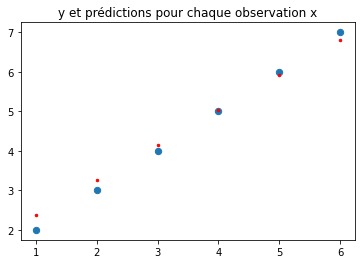

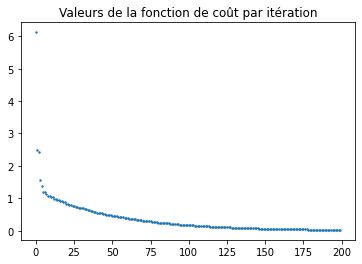

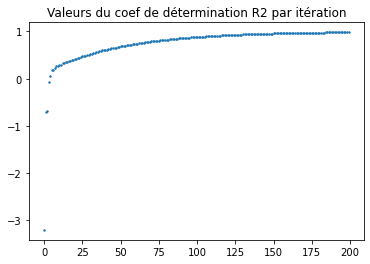

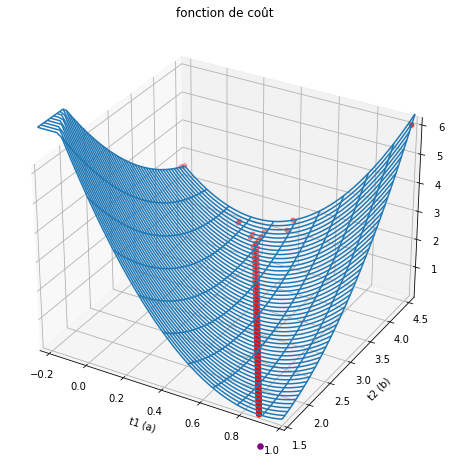

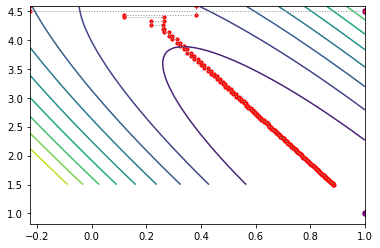

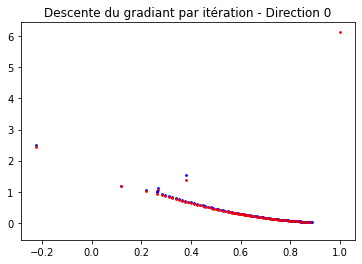

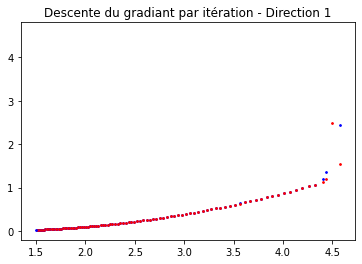

Intervalles de confiance des deux paramètres :
 ([0.5517975447583807, 1.2198123200241076], [1.4260734696580173, 1.5704212565427518])


In [251]:
#------------------------------
# Lancement de l'algorithme
#------------------------------
#n_iterations        #nombre d'itérations choisi
#learning_rate       #le coefficient de descente
#Theta               #la matrice (m,1) Theta des paramètres de départ -> un random de n+1 paramètres (n features + biais)


#Theta initial = (a=pente calculée avec le min y et max y pour x min et x max , b=min y)
Result_modele_lineaire_simple = algo(x, X, Y, \
                                     Theta=np.array([[(Y.max() - Y.min())/ (x.max() - x.min())],[Y.mean()]]), \
                                     n_iterations=200, learning_rate=0.1, \
                                     graph_ok=True, method=2)

Theta_final, Theta_values, cost_function_values, R2_values, IC = Result_modele_lineaire_simple

#Affichage des intervalles de confiance (car ici n+1=2 paramètres)
print("Intervalles de confiance des deux paramètres :\n", IC)



#### Commentaires : 

On voit dans ce cas que le nombre d'itérations n'est pas suffisant (graphique 1). La fonction de coût est pourtant déjà proche de 0.

Cela s'explique du fait que la pente étant de plus en plus faible à l'approche du minimum, le déplacement devient de plus en plus petit. Voir une solution avec la méthode 3 (frein) du calcul de la descente de gradiant.


## Abis : Augmentation du nb d'itérations

nb itérations = 700 
learning_rate = 0.1


In [ ]:
#------------------------------
# Lancement de l'algorithme
#------------------------------
Result_modele_lineaire_simple = algo(x, X, Y, Theta=np.array([[-2],[20]]), n_iterations=700, learning_rate=0.1, \
                                     graph_ok=True, method=2)




Ici, le nombre d'itérations permet de se rapprocher suffisamment du point minimum malgré la réduction de la pente (gradiant) et donc du déplacement à l'approche de ce point.


## B : Augmentation du learning rate

nb itérations = 200 (100 par paramètre dans le cas d'une descente 'alternée'
learning_rate = 0.2


In [ ]:
Result_modele_lineaire_simple = algo(x, X, Y, Theta=np.array([[-2],[20]]), n_iterations=200, learning_rate=0.5, \
                                     graph_ok=True, method=2)


Ici, le résultat n'est pas bon. 

Les valeurs s'envolent.

On ne converge pas. 

Le pas 0.5 est trop grand.




## C : Recherche de la valeur du learning rate (par tatonnement)



In [ ]:
Result_modele_lineaire_simple = algo(x, X, Y, Theta=np.array([[-2],[20]]), n_iterations=5000, learning_rate=0.2405, \
                                     graph_ok=True, method=2)


Ici, le coef de détermination est au maximum avant divergence. Cependant, malgré une valeur maximale avant divergence, la convergence se fait tout doucement, ce qui nécessite plus de 5000 itérations pour s'approcher d'un R2 de 0.62 seulement.

Le pas est maximum. Au delà le déplacement dans une direction est trop 'long' : on se retrouve sur un point où la fonction de coût est plus grande.

Ici, cela arrive mais le déplacement dans l'autre direction permet de descendre plus que l'on est monté. 

Au final, avec plus de 5000 itérations, on n'est pas encore arrivé au minimum (cf. direction 0 : Theta <> 1,1)

**Conclusion**
Le fait d'augmenter le pas n'assure pas d'atteindre plus rapide le minimum. 

Au contraire, on peut même s'en éloigner.

Et si on ne s'en éloigne pas, cela peut ralentir : on voit ici qu'en passant d'un taux de 0.1 à 0.14 (+40%), il faut maintenant plus de 2000 itérations pour se rapprocher du résultat obtenu avec 700 itérations.


Au final, il apparaît nécessaire d'ajuster le déplacement de façon plus précise, notamment en évitant de 'remonter'.




## D : Recherche de de la valeur du learning rate (avec 'frein dans la descente'  - Méthode 3)



In [ ]:
%%time
Result_modele_lineaire_simple = algo(x, X, Y, Theta=np.array([[-2],[20]]), n_iterations=25, learning_rate=2, \
                                     graph_ok=True, method=3)


Avec la méthode 3, la descente est très rapide. Dans chaque direction, le déplacement est optimisé pour ne pas remonter. On peut donc choisir un pas assez grand (ici 0.2), et en 25 itérations l'optimum est approché de très près (R2=0.9999999...).

**NB : Evolution : détermination du pas optimum de départ.**


# Résumé

On a construit un modèle linéaire de degré 1 de type f(x)=ax+b. On a déterminé la fonction de coût associée (en utilisant la norme euclidienne), la fonction gradiant correspondante (les fonctions dérivées dans chaque direction). </br>
Puis on a mis en place l'algorithme de descente du gradiant.

**1er résultats :** 
Avec des paramètres de départ aléatoires, ceux-ci sont proches des paramètres optimaux (1,1), la fonction de coût décroît très vite.
Cependant, elle décroît ensuite très lentement. Les prédictions sont fortement ajustées pour une faible variation de la fonction de coût relativement aux variations du départ. Ceci suggère que le critère de variation de la fonction de coût n'est pas suffisant pour arrêter la descente.

Le critère du R2 est de ce fait un critère important.


**Autres résultas :**
Avec la représentation 3D de la fonction de coût, on peut voir que les pentes sont très différentes selon la direction prise. On visualise la décroissance rapide de la fonction de coût au début des itérations, puis une décroissance plus douce ensuite.

#### A suivre : ajout des autres critères d'optimisation.









# Algorithme de calcul des moyennes des paramètres et du MSE par multi-échantillonage (Cross-validation)


**Evolutions :**
    Ajout du calcul de l'intervalle de confiance pour chaque paramètre
    Ajout du calcul du MSE

In [254]:
samples_nb=2
Theta_optim = [0.]*samples_nb
print(samples_nb)
print(Theta_optim, len(Theta_optim))

2
[0.0, 0.0] 2


In [255]:
def algo_mean_param(x,X,Y, parm_samples_nb=3, parm_n_iterations=500, parm_learning_rate=50,
                    parm_method=3, parm_graph_ok=False):

    """
    Fonction de calcul des paramètres moyens de la régression linéraire sur un ensemble de sous-échantillons
    aléatoires et indépendants
    Sortie : les moyennes des paramètres
    """

    #Initialisation
    sample_indices     = range(x.shape[0])
    sample_new_indices = sample_indices
    samples_nb         = parm_samples_nb
    samples_size       = X.shape[0] // samples_nb  #taille des échantillons = nb lignes de départ // nb éch

    #Préparation des variables
    Theta_optim_values = np.zeros(shape=(X.shape[1], parm_samples_nb)) #liste des theta obtenu à chaque itération

    #Affichage
    print("----------------------------")
    print("sample_indices     : ",sample_indices)
    print("sample_new_indices : ",sample_new_indices)
    print("samples_nb         : ",samples_nb)
    print("samples_size       : ",samples_size)
    print("----------------------------")

    #Boucle sur le nombre d'échantillons souhaités
    for sample_cpt in range(samples_nb):

        #choix (par tirage aléatoire uniforme) des indices parmis ceux qui restent
        sample_new_indices = np.random.choice(sample_new_indices, size=samples_size, replace=False)

        #Selection des nouvelles lignes correspondantes
        sample_x = x[sample_new_indices, :]
        sample_X = X[sample_new_indices, :]
        sample_Y = Y[sample_new_indices]

        #Estimation des paramètres sur l'échantillon courant :
        Result_modele_lineaire_simple = algo(sample_x, sample_X, sample_Y, 
                                             Theta=np.array([[(Y.max() - Y.min())/ (x.max() - x.min())],[Y.mean()]]), 
                                             n_iterations =parm_n_iterations, 
                                             learning_rate=parm_learning_rate, 
                                             graph_ok     =parm_graph_ok, 
                                             method       =parm_method)

        #Calcul des moyennes des paramètres et MSE
        Theta_optim_values[:,sample_cpt] = list(Result_modele_lineaire_simple[0]) #valorisation de la colonne i 
                                                                                  #(il faut convertir en array)

        #Préparation pour le tour suivant : sample_rows_current = reste des indices après sélection précédente
        sample_new_indices = np.delete(sample_indices, list(sample_new_indices), 0)

    #Calcul des moyennes des paramètres et MSE
    #print("Theta_optim     :", Theta_optim_values)
    Theta_optim_moy = np.mean(Theta_optim_values, 1)
    
    #Affichage du résultat
    #print("Theta_optim_moy :", Theta_optim_moy)
    
    return Theta_optim_moy, Theta_optim_values
    
    


----------------------------
sample_indices     :  range(0, 6)
sample_new_indices :  range(0, 6)
samples_nb         :  3
samples_size       :  2
----------------------------

résultat final avec n_iterations = 100

Theta=
[[0.99459995]
 [1.01453406]]

cost_function valeur finale=
[1.39319518e-06]

R2 = 0.9999643036841694


<ipython-input-83-7d35f11ec7d4>:11: RuntimeWarning: divide by zero encountered in double_scalars
  result  = np.sqrt( RSS(x, X, Y, Theta) / (m-2) )


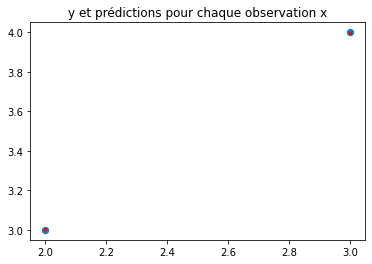

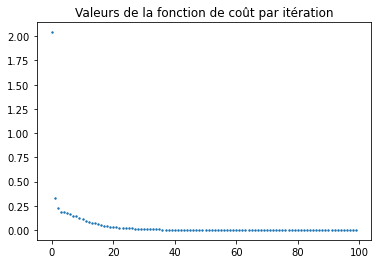

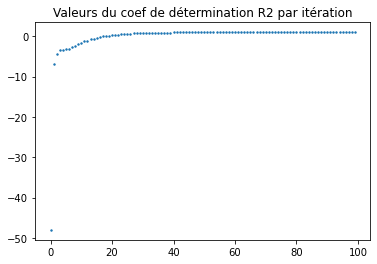

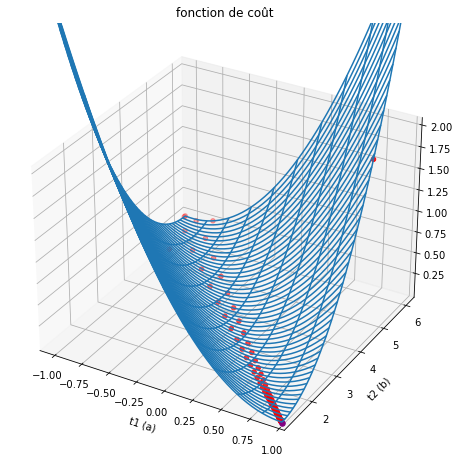

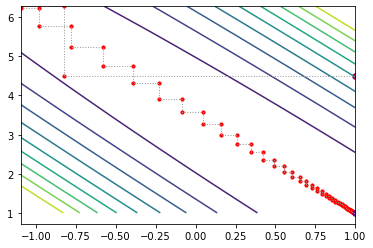

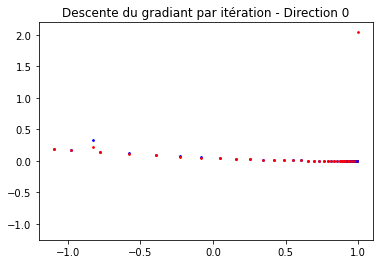

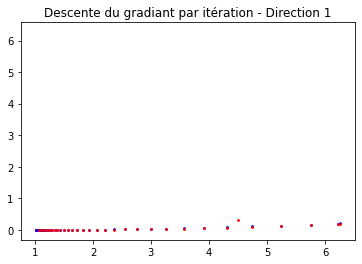

<ipython-input-83-7d35f11ec7d4>:11: RuntimeWarning: divide by zero encountered in double_scalars
  result  = np.sqrt( RSS(x, X, Y, Theta) / (m-2) )



résultat final avec n_iterations = 100

Theta=
[[1.]
 [1.]]

cost_function valeur finale=
[3.28692044e-31]

R2 = 1.0


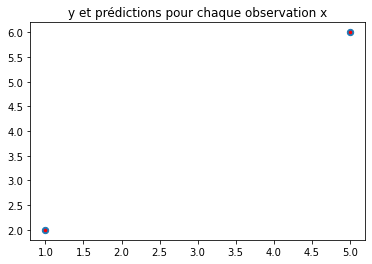

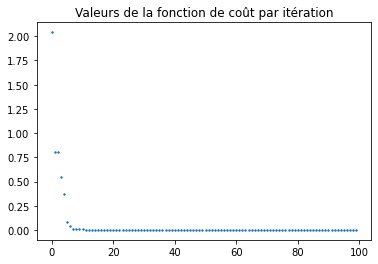

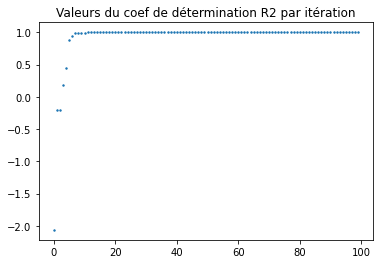

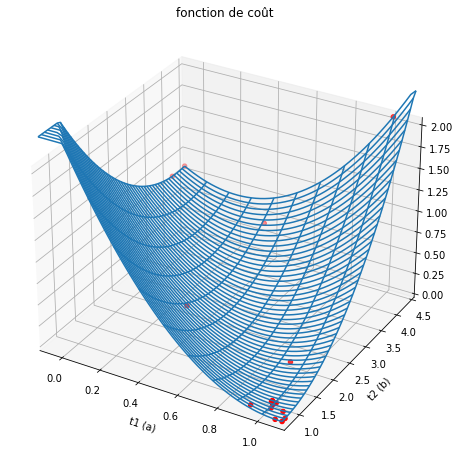

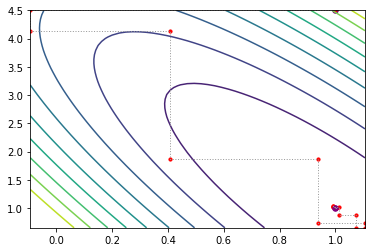

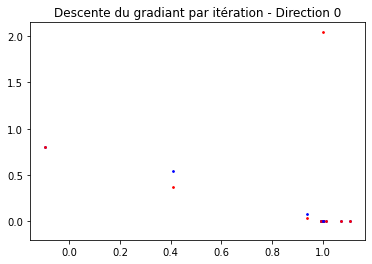

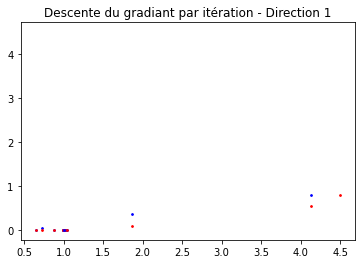

<ipython-input-83-7d35f11ec7d4>:11: RuntimeWarning: divide by zero encountered in double_scalars
  result  = np.sqrt( RSS(x, X, Y, Theta) / (m-2) )



résultat final avec n_iterations = 100

Theta=
[[0.89779987]
 [1.36994409]]

cost_function valeur finale=
[0.00046019]

R2 = 0.9895037372240932


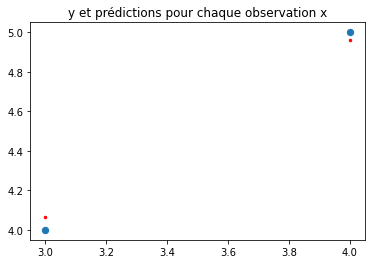

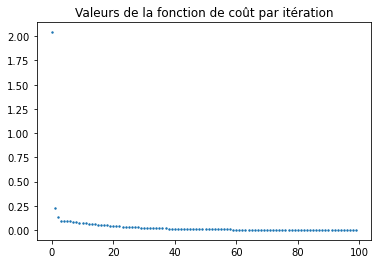

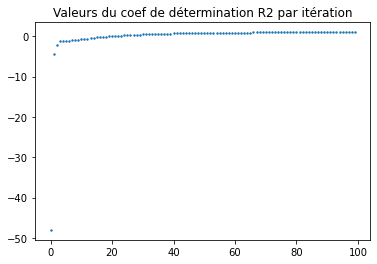

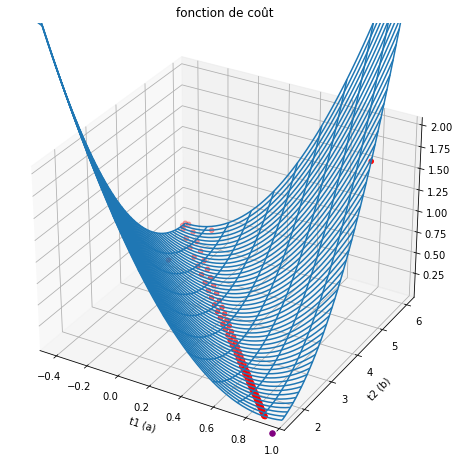

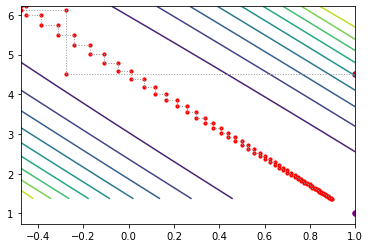

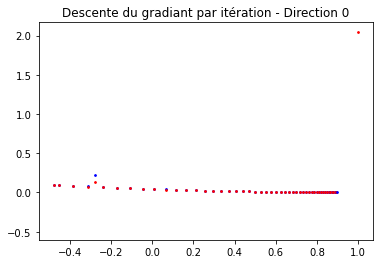

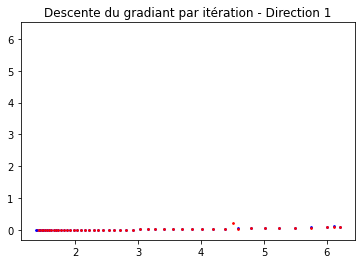


Résultats :

Theta moyen : [0.96413328 1.12815938]

Theta values:
 [[0.99459995 1.         0.89779987]
 [1.01453406 1.         1.36994409]]
Wall time: 14.8 s


In [256]:
%%time
np.random.seed(1)

x_test = np.array([
            [1],
            [2],
            [3],
            [4],
            [5],
            [6]
           ])

X_test = np.hstack((x_test, np.ones((x_test.shape[0],1),int))) 

Y_test = np.array([
            [2],
            [3],
            [4],
            [5],
            [6],
            [7],
           ])

results = algo_mean_param(x,X,Y, parm_samples_nb=3, parm_n_iterations=100, parm_learning_rate=5, 
                          parm_method=3, parm_graph_ok=True)

print("\nRésultats :\n")
print("Theta moyen :",results[0])
print("\nTheta values:\n",results[1])



Ici, on voit que selon l'échantillon, le nombre de pas nécessaire pour se rapprocher au mieux de l'optimum est différent. 
Il dépend notamment du point de départ. 

**Conclusion** : pour l'estimation de Theta, on pourra affiner le résultat en augmentant le nombre de pas ou éventuellement en augmentant ou même diminuant le pas, où en modifiant le point de départ.  

Il faudra dans tous les cas vérifier le R2 pour s'assurer qu'il soit le plus proche possible de 1.

!! voir le biais...


# Cas d'observations aléatoires 

Cas d'observations aléatoires - coef= 82.1903908407869
----------------------------
sample_indices     :  range(0, 1000)
sample_new_indices :  range(0, 1000)
samples_nb         :  1
samples_size       :  1000
----------------------------

résultat final avec n_iterations = 35

Theta=
[[82.13041848]
 [ 0.25857208]]

cost_function valeur finale=
[8203.45918331]

R2 = -34081.975786855175


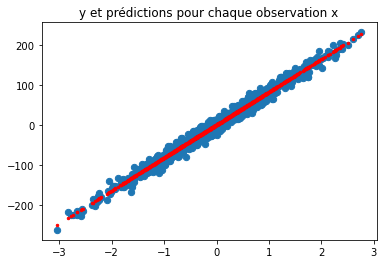

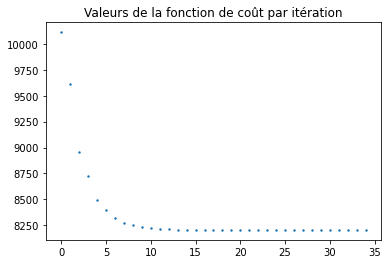

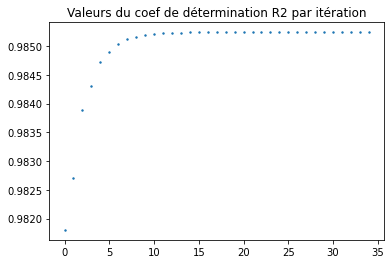

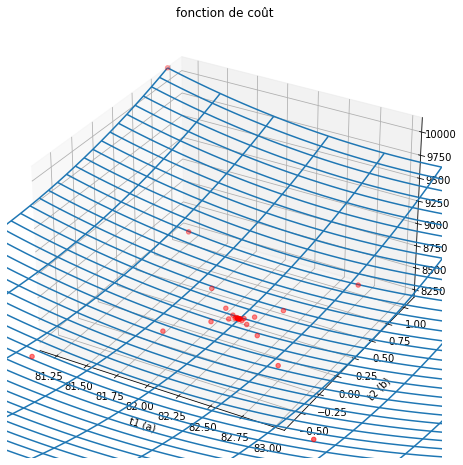

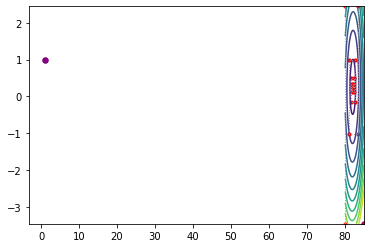

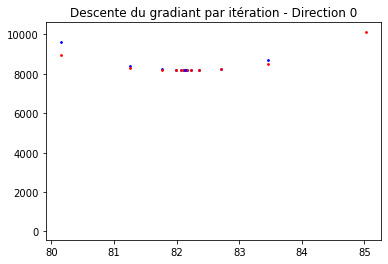

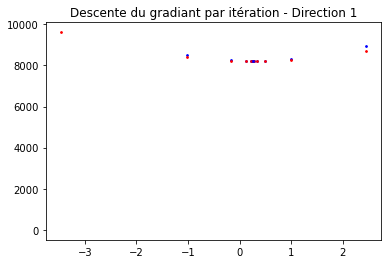


Résultats :

Theta moyen : [82.13041848  0.25857208]

Theta values:
 [[82.13041848]
 [ 0.25857208]]


In [257]:
from sklearn import datasets

n_samples = 1000
n_outliers = 50

x_test, Y_test, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

print("Cas d'observations aléatoires - coef=", coef)

#Ajout de la colonne pour la constante
X_test = np.hstack((x_test, np.ones((x_test.shape[0],1),int))) 
#Reformattage de Y_test en m lignes et 1 colonne au lieu de 1 array de m valeurs
Y_test = Y_test.reshape(Y_test.shape[0],1)

results = algo_mean_param(x_test,X_test,Y_test, 
                          parm_samples_nb=1, 
                          parm_n_iterations=35, parm_learning_rate=5, 
                          parm_method=3, parm_graph_ok=True)

   
print("\nRésultats :\n")
print("Theta moyen :",results[0])
print("\nTheta values:\n",results[1])

In [259]:
#------------------------------
# Lancement de l'algorithme
#------------------------------
#n_iterations        #nombre d'itérations choisi
#learning_rate       #le coefficient de descente
#Theta               #la matrice (m,1) Theta des paramètres de départ -> un random de n+1 paramètres (n features + biais)


from sklearn import datasets


n_samples = 1000
n_outliers = 50

x_test, Y_test, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

print("coef=", coef)

#Theta initial = (a=pente calculée avec le min y et max y pour x min et x max , b=min y)
Result_modele_lineaire_simple = algo(x_test, X_test, Y_test, \
                                     Theta=np.array([[(Y_test.max() - Y_test.min())/ (x_test.max() - x_test.min())],
                                                     [Y_test.mean()]]), \
                                     n_iterations=200, learning_rate=0.1, \
                                     graph_ok=False, method=3)


coef= 82.1903908407869

résultat final avec n_iterations = 200

Theta=
[[-4.61764969e-15  2.69227924e-15 -2.37267370e-15 ...  7.16947752e-16
  -6.07429270e-16  6.01282993e-16]
 [-2.15549295e+02  1.51741965e+02 -1.34999521e+02 ...  4.27167117e+01
  -3.54021857e+01  3.47800805e+01]]

cost_function valeur finale=
[0.]

R2 = -2309637.361873513


# Tests

In [ ]:
# Création d'une fonction
testf = lambda testx, testy: np.sin(testx) + np.cos(testy)
testX = np.linspace(0, 5, 100)
testY = np.linspace(0, 5, 100)
testX, testY = np.meshgrid(testX, testY)
 
testZ = testf(testX, testY)
 
plt.contour(testX, testY, testZ, levels=40)
plt.show()

In [ ]:
#Test
#récupération du nombre d'itérations et du nombre de directions (paramètres)
cost_function_values = Result_modele_lineaire_simple[2]
Theta_values = Result_modele_lineaire_simple[1]
nb_directions = X.shape[1] 
n_iterations  = len(cost_function_values)

print("nb_directions:",nb_directions)
#print(("range(direction_j, n_iterations, nb_directions):" ,list(range(direction_j, n_iterations, nb_directions))))

#Graphe pour chaque direction (paramètre)
for direction_j in range(0, nb_directions):
    print("direction_j:", direction_j)
    for k in range(direction_j, n_iterations-1, nb_directions): #on ne prend que les index correspondants aux chgmt de valeur de la direction
        plt.scatter(Theta_values[direction_j,k  ], cost_function_values[k  ], c='r',s=3)    #avant déplacement
        plt.scatter(Theta_values[direction_j,k+1], cost_function_values[k+1], c='b',s=3)    #après déplacement
        #plt.............la courbe
        plt.title("Descente du gradiant dans la direction "+str(direction_j))

    plt.show()

In [ ]:
plt.figure(figsize=(12, 3))
 
# Simple graphique imshow()
testX = np.random.randn(5, 5)
 
plt.subplot(131)
plt.imshow(testX)
 
# Matrice de corrélation des iris
from sklearn.datasets import load_iris
iris = load_iris()
testX = iris.data
testy = iris.target
 
plt.subplot(132)
plt.imshow(np.corrcoef(testX.T, testy))
 
# Matrice f(X, Y) = sin(X) + cos(Y)
testX = np.linspace(0, 5, 100)
testY = np.linspace(0, 5, 100)
testX, testY = np.meshgrid(testX, testY)
 
plt.subplot(133)
plt.imshow(f(testX, testY))
plt.colorbar()

In [ ]:
#Etude sélection aléatoire de lignes d'un array
import  numpy as np
an_array = np.array([[ 0,  1,  2],
 [ 1,  4,  5],
 [ 2,  7,  6],
 [ 3,  8,  7],
 [ 4,  9,  8],
 [ 5, 10, 11]])

print(an_array)

#Initialisation
sample_indices     = range(an_array.shape[0])
sample_new_indices = sample_indices
samples_nb         = 3  #nombre d'échantillons souhaités
samples_size       = an_array.shape[0] // samples_nb #taille des échantillons 

#Affichage
print("----------------------------")
print("sample_indices     : ",sample_indices)
print("sample_new_indices : ",sample_new_indices)
print("samples_nb         : ",samples_nb)
print("samples_size       : ",samples_size)
print("----------------------------")

#Boucle sur le nombre d'échantillons souhaités
for sample_cpt in range(samples_nb):

    #choix (par tirage aléatoire uniforme) des indices parmis ceux qui restent
    sample_new_indices = np.random.choice(sample_new_indices, size=samples_size, replace=False)
    print("debug-->random_new_indices:\n", sample_new_indices)

    #Selection des nouvelles lignes correspondantes
    random_sample_new = an_array[sample_new_indices, :]
    print("debug-->random_sample_new :\n", random_sample_new)

    #Préparation pour le tour suivant : sample_rows_current = reste des indices après sélection précédente
    sample_new_indices = np.delete(sample_indices, list(sample_new_indices), 0)

    
    
    


<ipython-input-252-dd580a5c3743>:30: UserWarning: Attempting to set identical bottom == top == 1.4982473631003845 results in singular transformations; automatically expanding.
  ax.set_ylim(np.min(Theta2),np.max(Theta2))


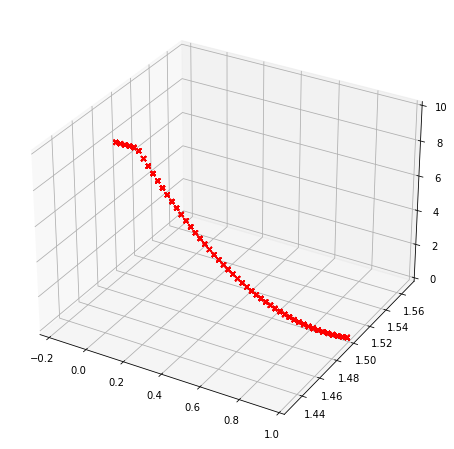

In [252]:
nb_pas_meshgrid = 50

# -------------------------------------------------------------------------------
# Création du maillage pour la représentation graphique avec meshgrid
# -------------------------------------------------------------------------------
t1 = np.linspace(np.min(Theta_values[0,:]), np.max(Theta_values[0,:]), num=nb_pas_meshgrid)   #x1=les valeurs du paramètre 1
t2 = np.linspace(np.min(Theta_values[1,:]), np.min(Theta_values[1,:]), num=nb_pas_meshgrid)   #x2=les valeurs du paramètre 2
Theta1, Theta2 = np.meshgrid(t1, t2)

# Calcul des valeur de X3 sur tout le maillage avec limite choisie entre min et max de la f° de coût sur le maillage
#Recherche du min et max de la fonction de coût sur le maillage
minfcost, maxfcost = minmaxfcost(X, Y, len(t1), len(t1), Theta1, Theta2)
#Calcul des valeurs de la f° de coût sur tout le maillage avec limitation
F=np.ones((len(t1), len(t2)))
for i in range(0, len(t1)):
    for j in range(0, len(t2)):
        F[i,j] = min(minfcost+0.8*(maxfcost-minfcost), #limitation = min + 80% de la diff. max-min de la f° de coût
                     cost_function(X, Y, np.array( [ [Theta1[i,j]], [Theta2[i,j]] ]))) 

# -------------------------------------------------------------------------------
#création de l'axe3D et de la surface
# -------------------------------------------------------------------------------
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe
#ax.plot_wireframe(Theta1, Theta2, F, rstride=1, cstride=1)
ax.scatter(Theta1, Theta2, F, c='r', marker='x')
ax.set_xlim(np.min(Theta1),np.max(Theta1))
ax.set_ylim(np.min(Theta2),np.max(Theta2))
ax.set_zlim(0,10)
plt.show()

In [185]:
Theta2[4,:]

array([1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736,
       1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736,
       1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736,
       1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736,
       1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736,
       1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736,
       1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736,
       1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736,
       1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736,
       1.49824736, 1.49824736, 1.49824736, 1.49824736, 1.49824736])

In [171]:
F[:,2]

array([7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297,
       7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297,
       7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297,
       7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297,
       7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297,
       7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297,
       7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297,
       7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297, 7.4990297,
       7.4990297, 7.4990297])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

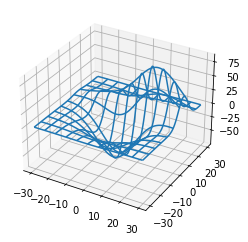

In [42]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
Xg, Yg, Zg = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(Xg, Yg, Zg, rcount=10, ccount=10)
plt.show()

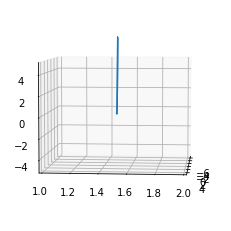

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Theta1, Theta2, F, rcount=1, ccount=1000)
ax.set_zlim(-5,5)
ax.set_ylim(1,2)
ax.set_xlim(-7,5)

ax.view_init(5, 5)
 
plt.show()